In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-2024/dadosTextosCientificos.tsv


In [2]:
df = pd.read_csv('../input/dl-2024/dadosTextosCientificos.tsv',
                   sep='\t',
                   engine='python',
                   encoding='latin-1')

In [3]:
df

Título_Público  \
0     Açúcar de frutas e aplicação em bolos como sub...   
1     Desenvolver uma linha de farofas com castanhas...   
2     Desenvolvimento de cobertura líquida para sorvete   
3          Desenvolvimento de conserva de tomate cereja   
4     Desenvolvimento de massa alimentícia enriqueci...   
...                                                 ...   
2720  Desenvolvimento de ativos biotecnológicos para...   
2721                                      SIMA MV POWER   
2722                           Talhonameno Ótimo Klabin   
2723  Tecnologia de Quantificação de Estoque de Carb...   
2724  Desenvolvimento de Plataforma Digital de Bioi...   

                                      Descricao_pública  
0     O uso de inovações tecnológicas auxilia as ind...  
1     O uso de inovações tecnológicas auxilia as ind...  
2     O Brasil é considerado um país com a maior bio...  
3     O Brasil é considerado o país com maior biodiv...  
4     Nos últimos anos a comunidade científica tem d...  
...                                                 ...  
2720  O avanço das tecnologias para estudos genômico...  
2721  Projeto de PD&I para desenvolvimento de um sis...  
2722  A Klabin S/A é uma empresa brasileira, de cará...  
2723  Com a execução do presente projeto espera-se d...  
2724  Desenvolvimento de Plataforma Digital de Bioin...  

[2725 rows x 2 columns]

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import spacy

In [5]:
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [6]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carregar o modelo SpaCy
nlp = spacy.load('pt_core_news_lg')

def preprocess_text(text):
    if pd.isnull(text):
        return "", []
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extrair entidades
    return " ".join(lemmatized), entities

# Carregar a base de dados
df = pd.read_csv('/kaggle/input/dl-2024/dadosTextosCientificos.tsv', sep='\t', encoding='latin1')

df['texto_completo'] = df['Título_Público'] + " " + df['Descricao_pública']
df['texto_completo'].fillna("", inplace=True)

# Processar o texto e extrair entidades
df['texto_preprocessado'], df['entidades'] = zip(*df['texto_completo'].apply(preprocess_text))

vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # n-grama de 1 e 2 palavras
X = vectorizer.fit_transform(df['texto_preprocessado'])

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

score = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {score}')

for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['Título_Público'])

# Exibir as entidades para cada cluster
for i in range(num_clusters):
    print(f"\nEntidades no Cluster {i}:")
    for entities in df[df['cluster'] == i]['entidades']:
        print(entities)

def get_top_keywords(cluster_centers, terms, num_terms=10):
    top_keywords = []
    for i, center in enumerate(cluster_centers):
        term_ranking = center.argsort()[-num_terms:][::-1]
        keywords = [terms[idx] for idx in term_ranking]
        top_keywords.append(keywords)
    return top_keywords

terms = vectorizer.get_feature_names_out()
top_keywords = get_top_keywords(kmeans.cluster_centers_, terms)

for i, keywords in enumerate(top_keywords):
    print(f"\nPrincipais palavras no Cluster {i}:")
    print(", ".join(keywords))


/tmp/ipykernel_23/3972988024.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['texto_completo'].fillna("", inplace=True)
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.001580859729012018

Cluster 0:
7       Desenvolvimento de molhos pesto de manjericão ...
8         Desenvolvimento de Shake instantâneo com frutos
16      AgriGear - Superacabamento de engrenagens para...
17      Caixa de Transmissão IoT para monitoramento de...
18      DfTP - Avaliação Termofluídica de uma Caixa de...
                              ...                        
2702    Otimização inteligente de parâmetros do proces...
2712    Sistema inteligente de classificação de planta...
2713    Sistema para classificação estatística de grão...
2715    Desenvolvimento de componentes e processos pro...
2721                                        SIMA MV POWER
Name: Título_Público, Length: 571, dtype: object

Cluster 1:
0       Açúcar de frutas e aplicação em bolos como sub...
1       Desenvolver uma linha de farofas com castanhas...
2       Desenvolvimento de cobertura líquida para sorvete
3            Desenvolvimento de conserva de tomate cereja
4       Desenvolvi

In [7]:
!pip install sentence-transformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 5.4 MB/s eta 0:00:00


In [8]:
!pip install transformers

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/tmp/ipykernel_23/3091638276.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['texto_completo'].fillna("", inplace=True)
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 4, Silhouette Score: 0.05645405873656273


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 5, Silhouette Score: 0.053701117634773254


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 6, Silhouette Score: 0.05493137240409851


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 7, Silhouette Score: 0.04168563336133957


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 8, Silhouette Score: 0.048817384988069534


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 9, Silhouette Score: 0.04711516574025154

Número ótimo de clusters: 4


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0:
Tomografia Computadorizada, IIot, Sistema Inteligente para Diagnóstico de Hardware, Protótipo, Business Intelligence, Integração, TRL, Digital Out of Home, PFood, Verificador de Laudos de exames, ATAS, Embutidas, Plataformas Offshore, Plataforma de Produto Unificada, LACTEC, Fadiga das amraduras, Construção, Prumo, WAMA, Subsea to Shore, KHOMP INDUSTRIA E COMERCIO LTDA, Ocorrências, AI Quality Toolbox Pesquisar, MultiHub-IoT Pesquisa, HEMERA, Um Framework para Avaliação de Indicadores Corporativos, Smart Grid, Plataforma digital da, Web, Cadeira de Rodas Monobloco, Fase 3, Estado de São Paulo Desenvolvimento, SENSE, Medição, ML AGIS Pesquisar, Projeto ARIEL, Jiga PFI, Sistema de Cabeça de Poço Submarina Desenvolvimento, MindFocus:, SOFTWARE DE PRODUÇÃO - MVP Desenvolvimento, Proqualit, Interface Homem-Máquina, Solução para Gestão da Rastreabilidade Industrial  Módulo de Business In, Ambientes de Baixa Conectividade Desenvolver, Batom Inteligente Fase V, Gamificação e Inte

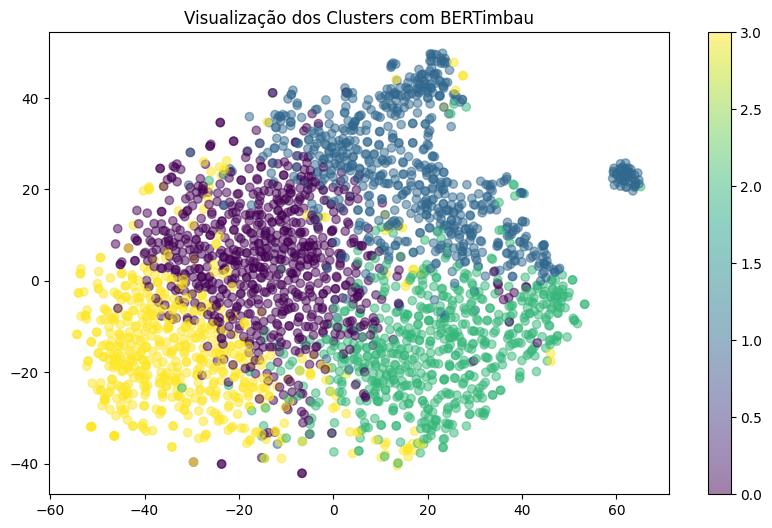


Cluster 0:
22      HUAWEI - PV generation with optimal BESS based...
24                                         Siemens-Energy
27                                        5G-EdgeServices
29                                 Accounting Integration
36                                                  AIPIM
                              ...                        
2711    Sistema de navegação e inspeção autônoma de pá...
2712    Sistema inteligente de classificação de planta...
2713    Sistema para classificação estatística de grão...
2715    Desenvolvimento de componentes e processos pro...
2718    Plataforma de Automatização de Workflows de En...
Name: Título_Público, Length: 771, dtype: object

Cluster 1:
0       Açúcar de frutas e aplicação em bolos como sub...
1       Desenvolver uma linha de farofas com castanhas...
2       Desenvolvimento de cobertura líquida para sorvete
3            Desenvolvimento de conserva de tomate cereja
4       Desenvolvimento de massa alimentícia enriqueci...

In [9]:
import pandas as pd
import spacy
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import torch

# Configurar dispositivo para GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carregar o modelo SpaCy e o modelo BERTimbau
nlp = spacy.load('pt_core_news_lg')
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = BertModel.from_pretrained('neuralmind/bert-base-portuguese-cased').to(device)

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemmatized)

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Carregar a base de dados
df = pd.read_csv('/kaggle/input/dl-2024/dadosTextosCientificos.tsv', sep='\t', encoding='latin1')
df['texto_completo'] = df['Título_Público'] + " " + df['Descricao_pública']
df['texto_completo'].fillna("", inplace=True)

# Processar o texto
df['texto_preprocessado'] = df['texto_completo'].apply(preprocess_text)

# Função para obter embeddings do BERTimbau em lotes
def get_bert_embeddings(texts, batch_size=16):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy())
    return np.vstack(embeddings)

# Gerar embeddings usando BERTimbau
embeddings = get_bert_embeddings(df['texto_preprocessado'].tolist(), batch_size=16)

# Testar diferentes números de clusters
scores = []
range_n_clusters = range(4, 10)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    scores.append(silhouette_avg)
    print(f'Número de clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')

# Escolher o número de clusters com a maior média de silhueta
optimal_clusters = range_n_clusters[scores.index(max(scores))]
print(f'\nNúmero ótimo de clusters: {optimal_clusters}')

# Refit KMeans com o número ótimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

# Extraindo entidades nomeadas para cada texto
df['entidades'] = df['texto_completo'].apply(extract_entities)

# Resumindo as entidades por cluster
cluster_entities = df.groupby('cluster')['entidades'].agg(lambda x: list(set(sum(x, [])))).reset_index()

# Exibir as entidades por cluster
for index, row in cluster_entities.iterrows():
    print(f"\nCluster {row['cluster']}:")
    print(", ".join(row['entidades']))

# Visualização com t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title("Visualização dos Clusters com BERTimbau")
plt.colorbar(scatter)
plt.show()

# Exibir principais informações dos clusters
for i in range(optimal_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['Título_Público'])


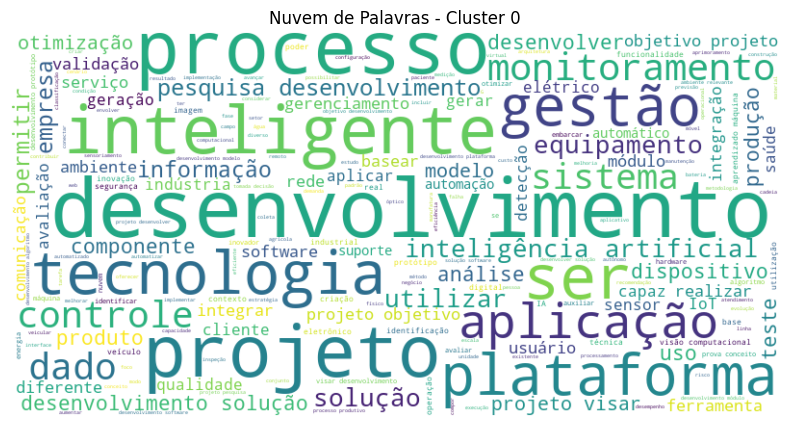

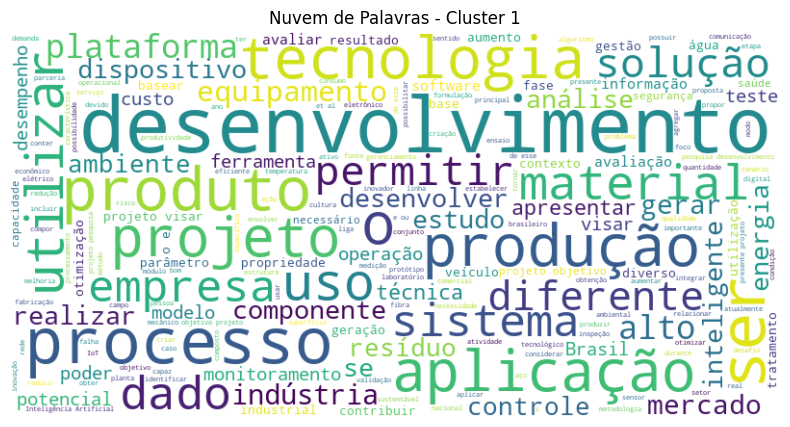

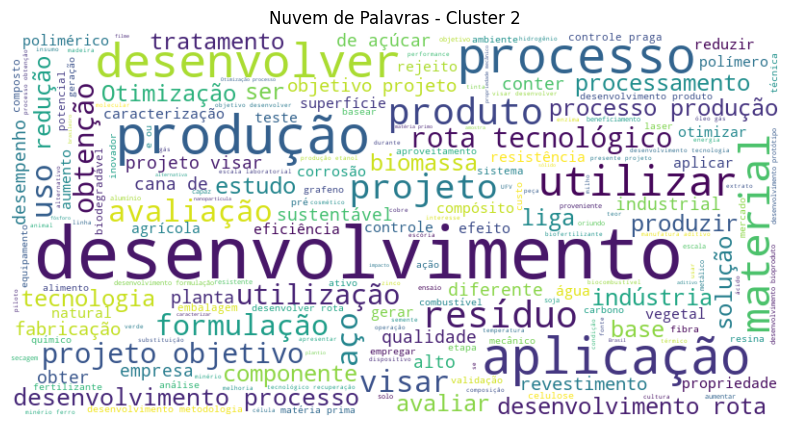

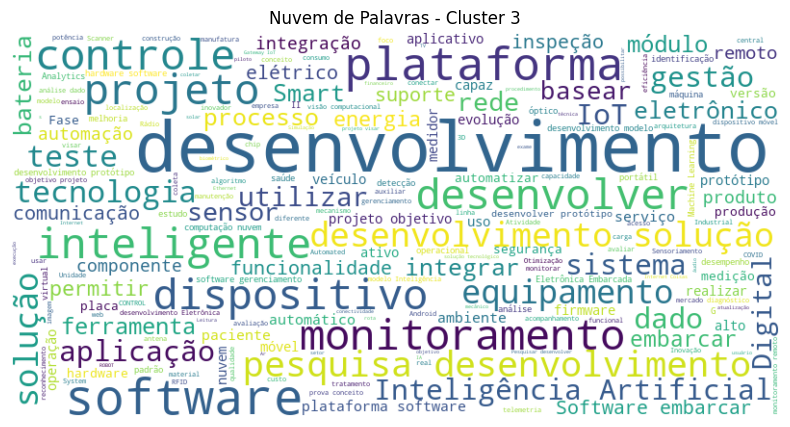

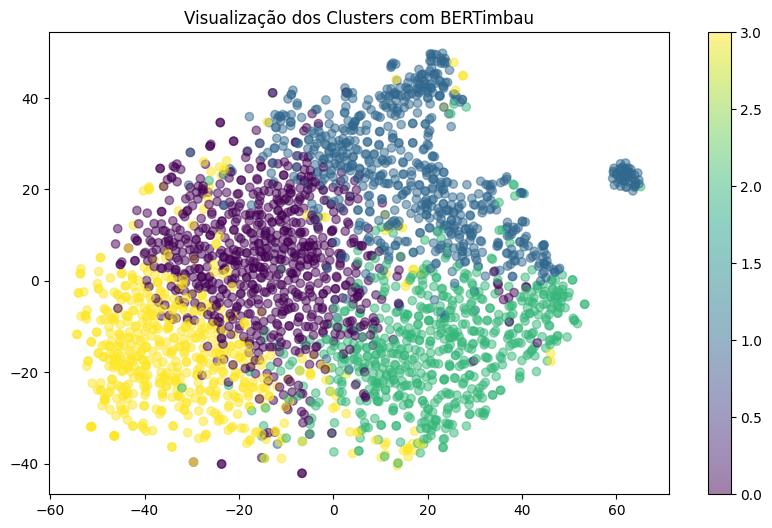


Cluster 0:
22      HUAWEI - PV generation with optimal BESS based...
24                                         Siemens-Energy
27                                        5G-EdgeServices
29                                 Accounting Integration
36                                                  AIPIM
                              ...                        
2711    Sistema de navegação e inspeção autônoma de pá...
2712    Sistema inteligente de classificação de planta...
2713    Sistema para classificação estatística de grão...
2715    Desenvolvimento de componentes e processos pro...
2718    Plataforma de Automatização de Workflows de En...
Name: Título_Público, Length: 771, dtype: object

Cluster 1:
0       Açúcar de frutas e aplicação em bolos como sub...
1       Desenvolver uma linha de farofas com castanhas...
2       Desenvolvimento de cobertura líquida para sorvete
3            Desenvolvimento de conserva de tomate cereja
4       Desenvolvimento de massa alimentícia enriqueci...

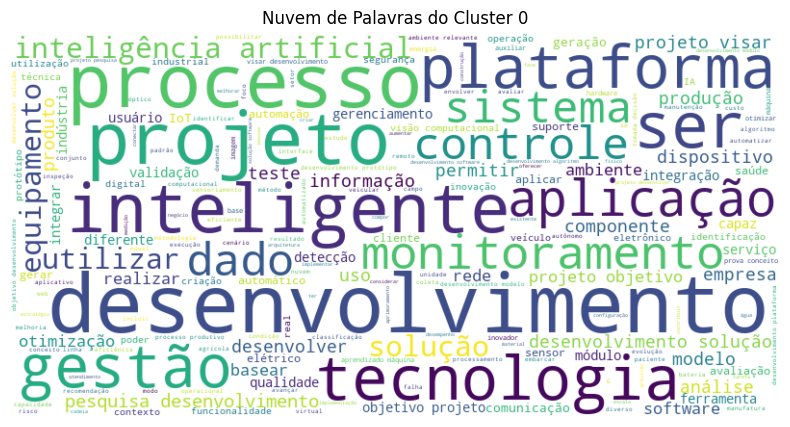

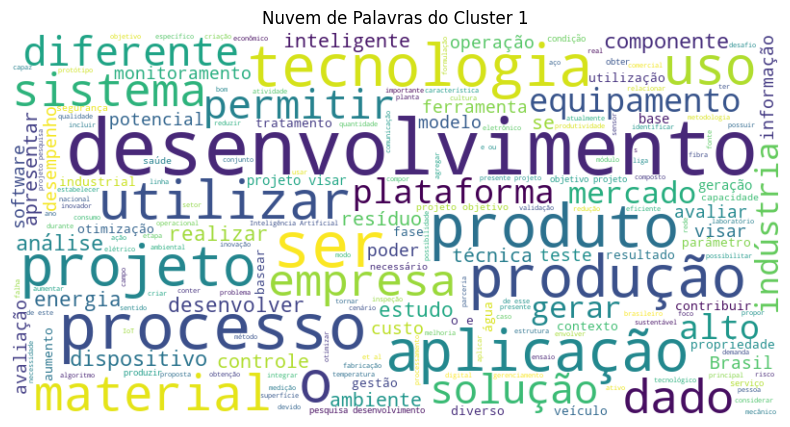

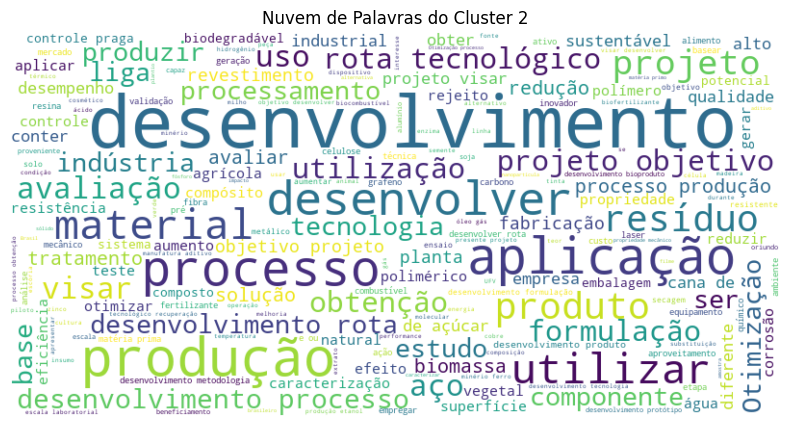

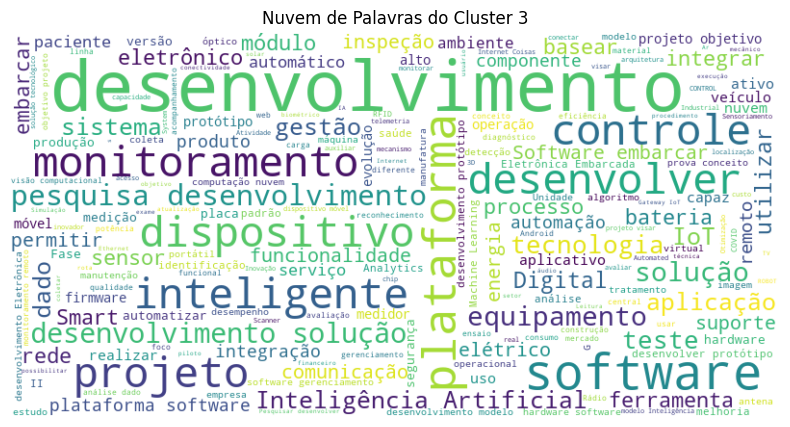

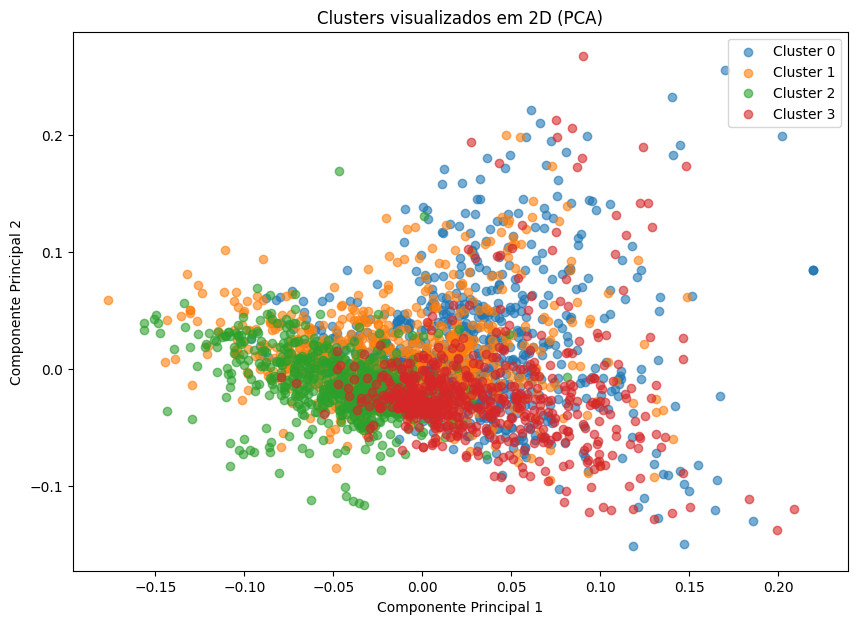

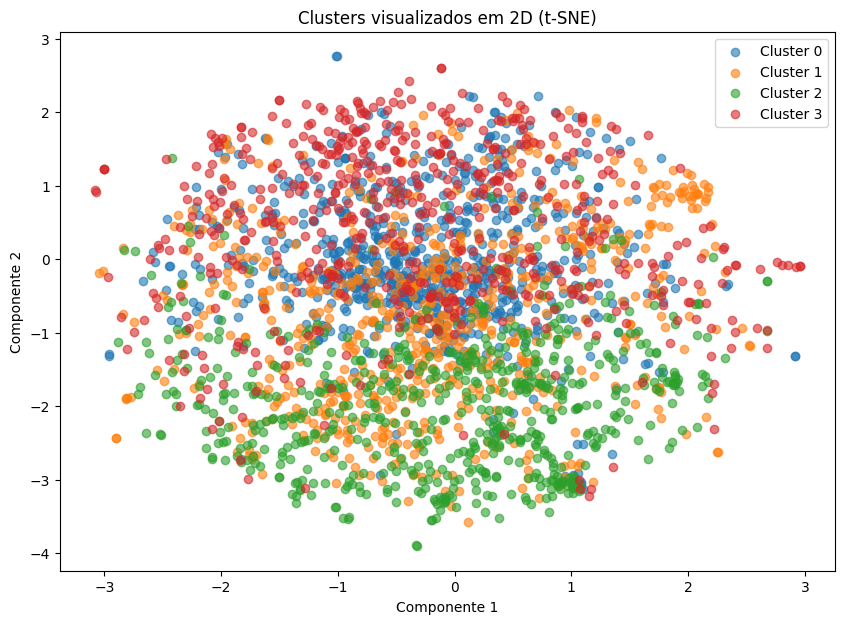

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
def generate_wordcloud(cluster_data, cluster_number):
    text = " ".join(cluster_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvem de Palavras - Cluster {cluster_number}")
    plt.show()

# Gerar nuvens de palavras para cada cluster
for i in range(optimal_clusters):
    cluster_texts = df[df['cluster'] == i]['texto_preprocessado']
    generate_wordcloud(cluster_texts, i)

# Visualização com t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title("Visualização dos Clusters com BERTimbau")
plt.colorbar(scatter)
plt.show()

# Exibir principais informações dos clusters
for i in range(optimal_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['Título_Público'])
# Gerar nuvens de palavras para cada cluster
for i in range(num_clusters):
    cluster_text = " ".join(df[df['cluster'] == i]['texto_preprocessado'])
    
    create_wordcloud(cluster_text, f'Nuvem de Palavras do Cluster {i}')

def plot_pca_clusters(X, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())
    
    plt.figure(figsize=(10, 7))
    
    # Plotar cada cluster com uma cor diferente
    for cluster in range(num_clusters):
        plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], 
                    label=f'Cluster {cluster}', alpha=0.6)
    
    plt.title('Clusters visualizados em 2D (PCA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()


plot_pca_clusters(X, df['cluster'])


def plot_tsne_clusters(X, labels):
    tsne = TSNE(n_components=2, perplexity=40, random_state=42)
    X_tsne = tsne.fit_transform(X.toarray())
    
    plt.figure(figsize=(10, 7))
    
    # Plotar cada cluster com uma cor diferente
    for cluster in range(num_clusters):
        plt.scatter(X_tsne[labels == cluster, 0], X_tsne[labels == cluster, 1], 
                    label=f'Cluster {cluster}', alpha=0.6)
    
    plt.title('Clusters visualizados em 2D (t-SNE)')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.show()

plot_tsne_clusters(X, df['cluster'])
